## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_tcp_full_scan_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329395.936902
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    329395.936902
1    329395.236431
2    329396.083340
3    329396.125233
4    329396.255096
5    329397.595438
6    329396.169998
7    329396.214909
8    329396.440032
9    329396.619023
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    329396.26764
dtype: float64

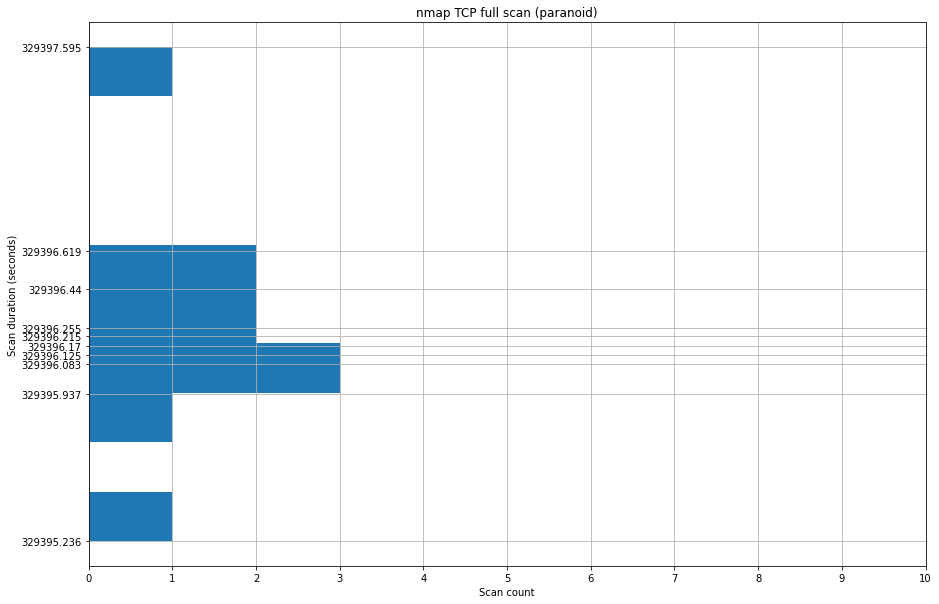

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

0
count      10.000000
mean   329396.267640
std         0.592146
min    329395.236431
25%    329396.093813
50%    329396.192454
75%    329396.393798
max    329397.595438

## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06672813920286



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 44530 80
2 40062 445
3 41602 113
4 53380 199
5 60890 3306
6 46380 135
7 41826 8080
8 52444 110
9 41020 8888
10 59290 993
11 44532 80
12 52732 53
13 40282 139
14 37184 1723
15 60830 22
16 41838 111
17 51656 1720
18 51092 143
19 47188 1025
20 44262 3389
21 42888 25
22 44534 80
23 39804 21
24 58310 587
25 35576 995
26 39146 5900
27 58402 23
28 49522 443
29 40076 256
30 41176 554
31 39328 50002
32 38198 6566
33 44536 80
34 37832 8222
35 49220 5440
36 52018 4279
37 50806 1
38 37384 6112
39 39224 2144
40 49226 9917
41 54322 6692
42 33854 7001
43 38498 1583
44 44538 80
45 60634 58080
46 36820 7
47 32986 3869
48 58614 1805
49 36128 19350
50 49170 4445
51 38494 9594
52 40628 787
53 55546 1761
54 40794 27353
55 44540 80
56 38844 10617
57 42420 32769
58 46170 808
59 33884 6025
60 58494 179
61 33640 3690
62 56546 1046
63 45852 2401
64 51350 2492
65 59864 5999
66 44542 80
67 38984 9101
68 54292 8093
69 46686 52848
70 37166 1247
71 53518 1117
72 40242 1718
73 50880 687
74 43824 50300
75 42962 9418

601 35328 2040
602 42762 406
603 59338 1721
604 46000 3527
605 44674 80
606 39500 3826
607 51398 4443
608 58722 9011
609 36394 2000
610 41984 32773
611 53402 1974
612 39642 2119
613 40964 563
614 37594 3
615 47396 5802
616 44676 80
617 56228 6646
618 50792 34573
619 51768 1037
620 42082 1164
621 47784 2008
622 48916 5100
623 45652 8400
624 38270 28201
625 58738 8192
626 52034 1024
627 44678 80
628 51488 306
629 41144 6881
630 41494 7402
631 37568 765
632 45670 3323
633 43488 10628
634 46174 8873
635 56044 646
636 51310 1187
637 42024 3914
638 44680 80
639 38104 1092
640 42114 6000
641 49102 14442
642 43186 13
643 45622 1131
644 55176 2009
645 40976 9290
646 59008 1812
647 37198 2068
648 55594 9968
649 44682 80
650 33876 85
651 36520 4662
652 35288 5120
653 60696 19801
654 40554 49155
655 45620 4125
656 46346 2121
657 59144 10010
658 44610 2030
659 52198 5004
660 44686 80
661 50652 8402
662 39150 1026
663 53328 1097
664 55992 31337
665 35344 9876
666 60598 8899
667 57740 1011
668 35050 

524 54036 9917
525 34942 32
526 57668 1721
527 57650 2800
528 50424 1025
529 60570 2008
530 53008 3372
531 35042 8031
532 38864 1122
533 59584 52848
534 33718 1086
535 46172 20031
536 58524 1
537 54662 2034
538 44628 301
539 50426 1025
540 57348 8093
541 60160 667
542 45392 222
543 45374 2013
544 36210 1199
545 42702 1124
546 46356 1805
547 54498 1061
548 55772 1175
549 49956 4000
550 50428 1025
551 51646 9999
552 58818 888
553 46684 3017
554 45834 6792
555 52408 5431
556 40384 2323
557 44224 60020
558 45404 9968
559 55764 34571
560 57522 5718
561 50430 1025
562 41640 5679
563 60550 2004
564 42454 3325
565 34962 648
566 33194 8443
567 52588 44443
568 47284 340
569 50030 44442
570 51978 2161
571 39540 8873
572 50432 1025
573 46520 7741
574 53676 4111
575 45494 1322
576 45892 5902
577 54342 1088
578 33620 2005
579 39732 3986
580 35980 1091
581 52998 631
582 51126 8654
583 50434 1025
584 53452 1000
585 46854 52869
586 34406 1110
587 44010 32783
588 40000 5080
589 42300 3828
590 42164 7100

91 42106 42510
92 56310 8045
93 47796 31038
94 54404 1218
95 37598 9080
96 45160 8011
97 51822 4125
98 56108 8800
99 51468 113
100 48644 1001
101 38986 5214
102 57498 2040
103 55860 1688
104 56716 2222
105 52734 23502
106 55896 163
107 54654 1009
108 59154 1455
109 42160 1501
110 51474 113
111 44806 1840
112 32814 515
113 47200 6006
114 42592 1031
115 54826 366
116 33172 8222
117 39056 3527
118 43568 668
119 37492 5431
120 37268 1199
121 51486 113
122 56026 636
123 57164 27353
124 53270 8181
125 51238 9878
126 53438 787
127 33178 7999
128 41564 5988
129 45950 1998
130 55696 5633
131 37272 1102
132 51492 113
133 35350 9103
134 51608 687
135 35522 49
136 40204 5544
137 55348 5226
138 58962 32782
139 39264 691
140 53424 4662
141 37904 306
142 36608 6779
143 51506 113
144 48030 83
145 52568 4446
146 40124 9877
147 46558 700
148 38360 1666
149 35536 3918
150 40638 12345
151 60618 9618
152 50646 9503
153 49132 1034
154 51516 113
155 55720 2602
156 42872 3920
157 56444 1028
158 37058 56738
15

1091 47894 1443
1092 49690 146
1093 46686 6543
1094 39978 2041
1095 40372 60020
1096 48434 6567
1097 35010 1132
1098 43578 4111
1099 59044 32779
1 36710 995
2 43250 445
3 58648 111
4 35280 139
5 44298 554
6 35154 22
7 33404 143
8 38820 256
9 55292 199
10 49010 53
11 36712 995
12 40410 80
13 53058 8080
14 33844 1720
15 38342 25
16 40186 113
17 46844 8888
18 54822 1723
19 35912 1025
20 58686 21
21 47426 993
22 36714 995
23 56610 135
24 53216 3389
25 55646 23
26 41408 3306
27 52366 587
28 38012 5900
29 56146 443
30 43556 110
31 46524 5405
32 55976 6389
33 36716 995
34 40676 800
35 49400 2381
36 37730 1043
37 35826 3168
38 50706 2869
39 44214 427
40 53140 5225
41 60418 2049
42 50054 9
43 34364 5989
44 36718 995
45 45718 9290
46 40366 9503
47 54788 2047
48 49006 1277
49 37364 1094
50 52482 9877
51 41114 10012
52 36182 3001
53 43764 27356
54 56496 1096
55 36720 995
56 38766 33899
57 40872 12265
58 58136 32781
59 32872 1801
60 46776 1049
61 46166 8333
62 50242 1151
63 39466 35500
64 37684 210

658 35176 1147
659 37286 7001
660 36856 995
661 59368 1085
662 39896 3
663 54516 2910
664 34844 7921
665 41874 4446
666 48144 7019
667 42694 1805
668 59926 3367
669 47832 5718
670 39786 4242
671 36858 995
672 51172 2003
673 46584 301
674 36940 1040
675 47146 5060
676 58952 4900
677 52946 3703
678 57968 3527
679 56878 5051
680 46246 903
681 60770 1175
682 36860 995
683 40686 2811
684 49696 32779
685 51638 30
686 49552 3809
687 60112 8081
688 42226 2033
689 46352 5999
690 39918 41511
691 52980 254
692 48870 8600
693 36862 995
694 51992 1322
695 50868 5922
696 50390 6004
697 51154 1271
698 41920 9099
699 59512 306
700 39512 8011
701 57592 1081
702 45836 33
703 40586 43
704 36864 995
705 48796 2196
706 58954 2004
707 38954 1600
708 46800 3390
709 40914 8087
710 41946 81
711 56618 7106
712 37354 4449
713 37952 1002
714 53972 5730
715 36866 995
716 36332 2042
717 36530 61532
718 46106 28201
719 55272 1434
720 44330 6789
721 40562 901
722 43856 1022
723 39900 3801
724 53262 60020
725 51694 53

226 59544 9200
227 50264 19283
228 46584 6839
229 48562 389
230 56954 19350
231 44798 139
232 47482 465
233 37716 1040
234 54944 60443
235 47774 27715
236 45830 711
237 42326 3766
238 55452 51103
239 41346 20005
240 46836 4444
241 54382 9003
242 44800 139
243 45874 1455
244 59026 555
245 45560 8500
246 50298 1272
247 49568 801
248 52296 64680
249 42392 1164
250 42234 1124
251 58644 9002
252 45896 4224
253 44802 139
254 33904 5221
255 54186 10616
256 40748 10003
257 41042 5730
258 35290 9595
259 43372 6009
260 48652 880
261 41298 1092
262 38398 2038
263 49636 10002
264 44804 139
265 52868 15002
266 34320 49175
267 52874 1106
268 45200 3268
269 47198 40911
270 44728 1077
271 48362 9575
272 39708 2001
273 59360 1009
274 59288 1061
275 44806 139
276 33058 3301
277 49180 5080
278 59740 65000
279 47842 7106
280 52378 5225
281 53314 4343
282 56346 5678
283 56668 1082
284 60172 548
285 33292 646
286 44808 139
287 54886 6389
288 51276 500
289 56020 37
290 37636 1149
291 45814 10082
292 50508 24

892 39350 5801
893 38004 10629
894 57558 58080
895 34102 9666
896 33856 24444
897 46916 5988
898 53934 6692
899 46304 1095
900 43668 10180
901 41218 3476
902 44950 139
903 51776 32770
904 39684 1126
905 54962 16001
906 36978 60020
907 55476 44443
908 36012 3986
909 43046 5962
910 59410 5510
911 44294 10009
912 35602 1501
913 44952 139
914 50990 1201
915 59418 3920
916 56228 32779
917 43736 6666
918 51708 5999
919 54020 264
920 58902 8042
921 60974 6346
922 46298 1027
923 52986 20828
924 44956 139
925 32888 902
926 44848 800
927 34718 32784
928 42200 3889
929 55722 2910
930 54974 1130
931 59886 1145
932 45182 4567
933 37176 1839
934 47472 51493
935 44958 139
936 34070 3071
937 42742 20222
938 60002 3546
939 35218 1163
940 54324 1137
941 47140 5060
942 40018 1121
943 38798 2041
944 34214 8093
945 36594 406
946 44962 139
947 49028 2718
948 58898 4125
949 60048 6059
950 57482 425
951 56040 992
952 44808 13782
953 35968 49159
954 43074 2119
955 41922 1113
956 36638 3077
957 44964 139
958 47

459 48726 49161
460 44016 32784
461 41490 7019
462 49774 3306
463 35598 1533
464 40156 3301
465 44032 19
466 57074 222
467 36962 1123
468 44304 3031
469 58212 6969
470 60272 57797
471 41016 691
472 52648 161
473 49854 3306
474 60314 6692
475 38692 27356
476 57690 843
477 43142 5850
478 38248 4662
479 53570 7402
480 48994 8081
481 43192 6788
482 33126 32769
483 51472 9102
484 49932 3306
485 58944 13782
486 48736 3690
487 41916 3323
488 47906 1138
489 57772 3800
490 54406 5963
491 35870 5102
492 55422 1218
493 44430 15660
494 52660 406
495 50010 3306
496 39746 5678
497 34200 749
498 35736 49167
499 38624 2099
500 40884 5033
501 54232 3827
502 54412 3659
503 50080 2522
504 39160 1900
505 47052 15004
506 50088 3306
507 53988 1183
508 48932 2021
509 58508 2557
510 46928 16016
511 46122 6668
512 35016 6156
513 50576 10243
514 33660 1082
515 47612 3828
516 49816 5904
517 50166 3306
518 54058 555
519 51238 1079
520 50302 8009
521 50832 50800
522 38970 2998
523 44432 3325
524 45816 2601
525 375

27 40396 25
28 51630 199
29 49776 5900
30 55198 1720
31 46496 5560
32 48822 3006
33 39980 554
34 59882 3914
35 34948 9071
36 38830 50800
37 60752 9535
38 36500 543
39 59172 1137
40 54990 5906
41 36134 1216
42 36156 1556
43 60352 5988
44 39982 554
45 51622 7938
46 34006 3077
47 51970 5004
48 49228 1028
49 42652 1900
50 48794 5922
51 51404 32775
52 36976 144
53 44538 49157
54 51032 999
55 39986 554
56 57964 1086
57 55022 9102
58 33244 1033
59 59530 514
60 37970 6502
61 55420 8086
62 52558 1721
63 55478 8093
64 36718 3690
65 41060 2607
66 39988 554
67 60798 10629
68 50730 33
69 55072 4848
70 54054 1036
71 41230 32781
72 35180 2525
73 53732 2288
74 41708 9878
75 46400 646
76 56754 23502
77 39990 554
78 57794 2009
79 53386 5120
80 32838 1433
81 40002 2967
82 42950 280
83 46868 8654
84 54544 616
85 46910 8100
86 59138 82
87 57188 5810
88 39992 554
89 45932 42510
90 53104 2021
91 38476 4321
92 47776 32774
93 49116 52869
94 47580 7496
95 60616 8200
96 37784 9101
97 42126 3369
98 59044 9207
99 

693 40134 554
694 56914 1782
695 49794 8994
696 48516 8011
697 50342 25735
698 41358 31337
699 46104 34573
700 56280 6646
701 41242 1131
702 39900 9503
703 51022 5001
704 40136 554
705 49788 3260
706 57954 6699
707 45644 5633
708 50728 2038
709 49964 5280
710 59696 4662
711 40046 1041
712 44000 1031
713 44190 44176
714 48234 125
715 40138 554
716 39294 1081
717 45704 617
718 35198 2121
719 50986 5414
720 52356 8333
721 43524 2020
722 50144 2604
723 46204 4045
724 55732 1192
725 51198 20000
726 40140 554
727 60582 1089
728 45402 981
729 55842 1077
730 56282 55555
731 49858 10004
732 45524 6567
733 53238 32770
734 42186 19315
735 34572 1154
736 53186 5566
737 40142 554
738 54308 9009
739 46046 3527
740 50800 2602
741 46198 5802
742 36022 3800
743 33286 2522
744 33922 2869
745 32992 888
746 35950 4000
747 44020 30951
748 40144 554
749 54542 4129
750 39660 8099
751 41104 1148
752 50256 14000
753 33664 458
754 60012 8443
755 56620 3003
756 37148 64623
757 58378 7937
758 48632 705
759 40146 

260 59934 5002
261 44850 8649
262 57306 4002
263 42892 32773
264 53804 21
265 41950 2008
266 36666 1110
267 43498 900
268 38246 1053
269 47060 65389
270 47616 9000
271 58192 65129
272 36350 3766
273 41216 5910
274 50846 9944
275 53806 21
276 48992 12345
277 35422 5500
278 36630 1328
279 50002 49160
280 48070 99
281 42126 43
282 59226 3851
283 48504 1072
284 39246 8651
285 50452 7100
286 53810 21
287 54230 33354
288 49492 3998
289 53136 1137
290 40746 7201
291 57210 3011
292 60372 5357
293 60752 5100
294 35176 4445
295 46310 9998
296 53576 1503
297 53812 21
298 50510 5960
299 58580 8086
300 43406 222
301 54420 2604
302 43098 9877
303 56110 2383
304 50240 19
305 58058 5050
306 50014 54328
307 42952 49999
308 53814 21
309 54418 6101
310 42018 2968
311 38106 1073
312 54814 1107
313 45600 2251
314 49452 1091
315 59500 6129
316 49298 64680
317 32818 3071
318 54282 683
319 53816 21
320 36860 7004
321 55594 8873
322 49560 6100
323 59984 51103
324 40142 5101
325 42376 6389
326 49120 1812
327 42

927 58018 8083
928 39802 7920
929 47052 1688
930 60186 2869
931 58952 8654
932 49470 1417
933 48634 9666
934 36756 19842
935 53956 21
936 52544 2048
937 45546 2323
938 42526 5904
939 40478 1755
940 47804 6106
941 49576 2099
942 59614 5911
943 53166 42510
944 59458 19315
945 58854 903
946 53958 21
947 43600 51493
948 60670 32774
949 60326 16992
950 45960 106
951 60536 1119
952 57890 8400
953 44846 49
954 41688 2920
955 34992 9593
956 39286 9110
957 53960 21
958 58376 58080
959 34970 1067
960 50264 4242
961 49174 990
962 32770 8443
963 57794 5907
964 44818 4443
965 39700 765
966 51992 1126
967 46092 11110
968 53962 21
969 56870 8652
970 55482 9503
971 43966 5666
972 48756 2525
973 47884 90
974 38268 2002
975 38948 25735
976 60124 1065
977 60470 3351
978 55866 1198
979 53964 21
980 37986 82
981 39962 1434
982 56282 416
983 47048 1026
984 51046 9502
985 60280 7938
986 54106 2030
987 45412 32772
988 57534 625
989 56944 2718
990 53966 21
991 36260 4279
992 46224 10004
993 53688 3971
994 4500

494 50214 1183
495 50060 993
496 39620 1037
497 53062 8443
498 37796 1805
499 49226 3211
500 41806 5060
501 53050 3367
502 55384 30
503 37088 617
504 53904 1130
505 42548 1524
506 50062 993
507 41030 6667
508 55956 5822
509 39874 1580
510 37138 4125
511 44336 37
512 52860 705
513 37222 4899
514 54368 2161
515 35820 5902
516 38440 7007
517 50066 993
518 44486 5004
519 46362 5962
520 57896 1011
521 39436 27352
522 40656 1972
523 43386 3689
524 60808 2725
525 36092 1095
526 38586 5054
527 41018 1029
528 50070 993
529 48644 2103
530 46364 90
531 58056 16018
532 51640 1034
533 49252 1311
534 44254 8654
535 38010 458
536 42588 7019
537 49970 5718
538 46690 85
539 50072 993
540 57056 64623
541 47956 2106
542 50900 31038
543 39680 7
544 50218 33354
545 53046 2010
546 57116 49156
547 39740 636
548 54898 3826
549 42532 3737
550 50074 993
551 55458 1443
552 48710 5802
553 36820 1090
554 39828 1117
555 54250 11111
556 58974 32776
557 38720 1094
558 60914 5560
559 58036 900
560 42844 1057
561 50076

62 40518 6100
63 48264 1079
64 52756 10004
65 45534 1272
66 47764 111
67 35010 119
68 36234 52822
69 50000 38292
70 56788 52673
71 48314 1434
72 43280 5225
73 55954 3889
74 35736 2161
75 48056 2869
76 46194 2222
77 47766 111
78 59564 4848
79 55456 880
80 41184 6346
81 56362 1974
82 46358 6106
83 43906 3493
84 60928 5051
85 33008 20
86 56370 1043
87 52448 58080
88 47768 111
89 45776 9593
90 50156 3017
91 44652 32781
92 44560 700
93 42562 32775
94 49764 3878
95 33156 646
96 48094 3826
97 60178 1083
98 51992 8090
99 47770 111
100 44356 2033
101 40970 35500
102 60516 616
103 60408 8193
104 39770 8300
105 50734 1914
106 50320 52848
107 55608 6669
108 35106 17988
109 55386 49159
110 47774 111
111 38618 1900
112 38160 1972
113 46508 7001
114 38466 3659
115 45762 30000
116 47128 1501
117 57102 912
118 38202 1001
119 35536 23502
120 46102 5825
121 47776 111
122 56688 4343
123 42212 3918
124 57284 3920
125 46678 49999
126 33960 6547
127 44582 4900
128 49766 81
129 51202 5120
130 34618 31337
131 

728 44958 7200
729 40034 5060
730 50710 3030
731 59460 2875
732 43018 5862
733 35592 90
734 39952 33354
735 47822 617
736 51078 1026
737 47906 111
738 53748 1113
739 44336 1108
740 42928 1174
741 33526 8011
742 37322 3323
743 41136 100
744 35920 497
745 40990 3800
746 58940 20222
747 55734 1105
748 47908 111
749 52784 2100
750 41018 3370
751 55868 981
752 50610 512
753 42492 9595
754 38142 8290
755 47056 61532
756 39218 8081
757 52528 4224
758 44084 40193
759 47910 111
760 44240 146
761 47898 1755
762 57092 1041
763 38638 311
764 59878 2601
765 41016 40911
766 44286 7019
767 58928 1039
768 33114 1045
769 42784 7741
770 47912 111
771 51254 5000
772 58740 30
773 56000 2048
774 43286 1086
775 49658 50636
776 60168 21571
777 48286 1051
778 33948 765
779 46782 5560
780 42920 911
781 47914 111
782 35170 1022
783 60578 9485
784 55208 1782
785 37326 6156
786 53738 389
787 55970 444
788 34400 2099
789 52888 60020
790 45070 7443
791 37716 32776
792 47916 111
793 36588 30718
794 34896 9618
795 41

In [14]:
orders_port

scannr  sport  dport
0           1  44530     80
1           2  40062    445
2           3  41602    113
3           4  53380    199
4           5  60890   3306
...       ...    ...    ...
10985    1095  36904      1
10986    1096  43438   4045
10987    1097  59730   5102
10988    1098  47936   1641
10989    1099  55066  17877

[10990 rows x 3 columns]

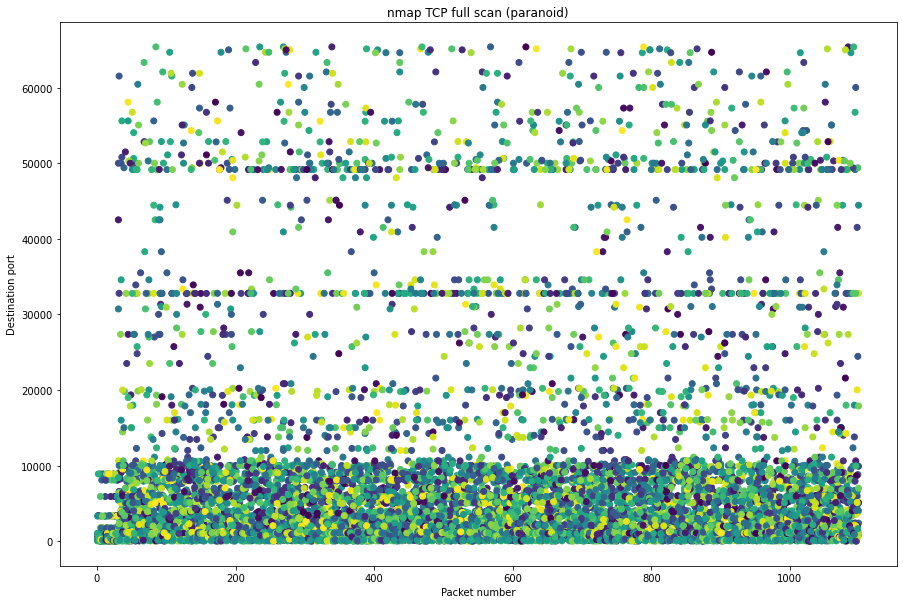

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

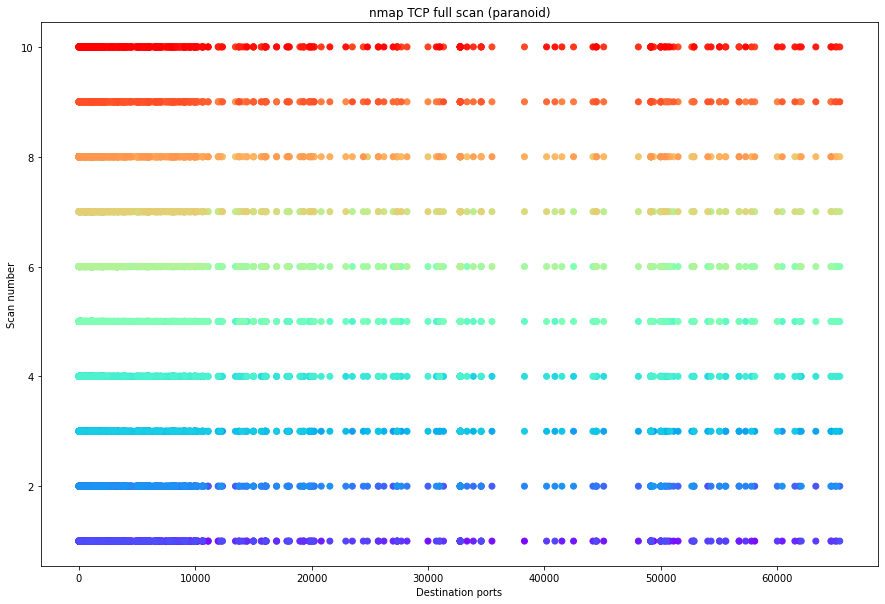

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


In [19]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [20]:
print(len(unused_ports))
print(unused_ports)

64535
[2, 5, 8, 10, 11, 12, 14, 15, 16, 18, 27, 28, 29, 31, 34, 35, 36, 38, 39, 40, 41, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 86, 87, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 112, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 140, 141, 142, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 257, 258, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273,

In [21]:
print(len(used_ports))

1000


## Payloads

In [22]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

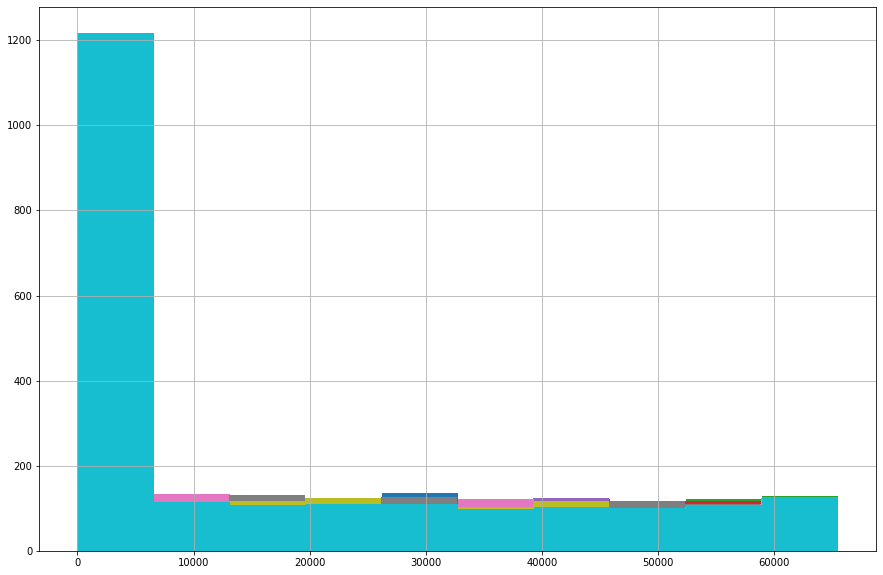

In [23]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

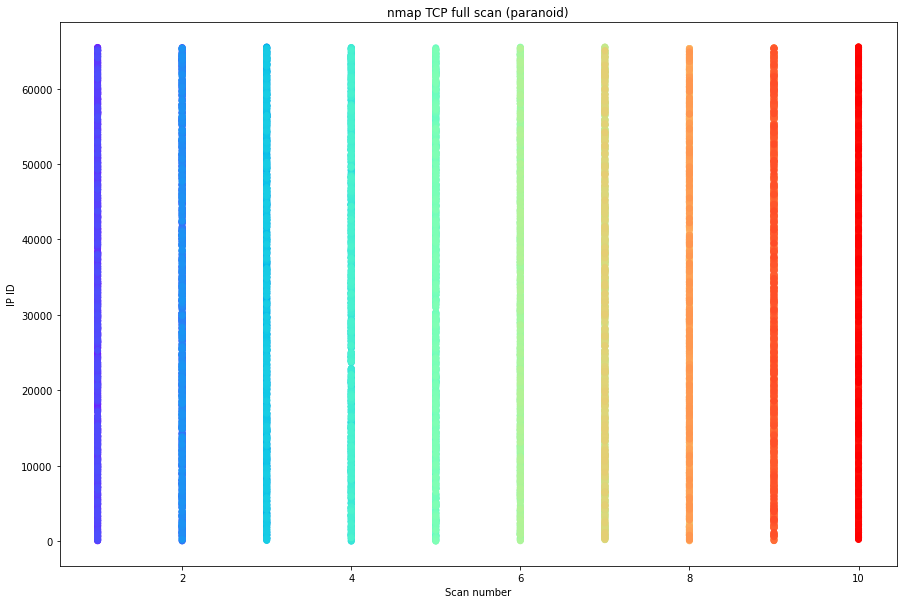

In [24]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


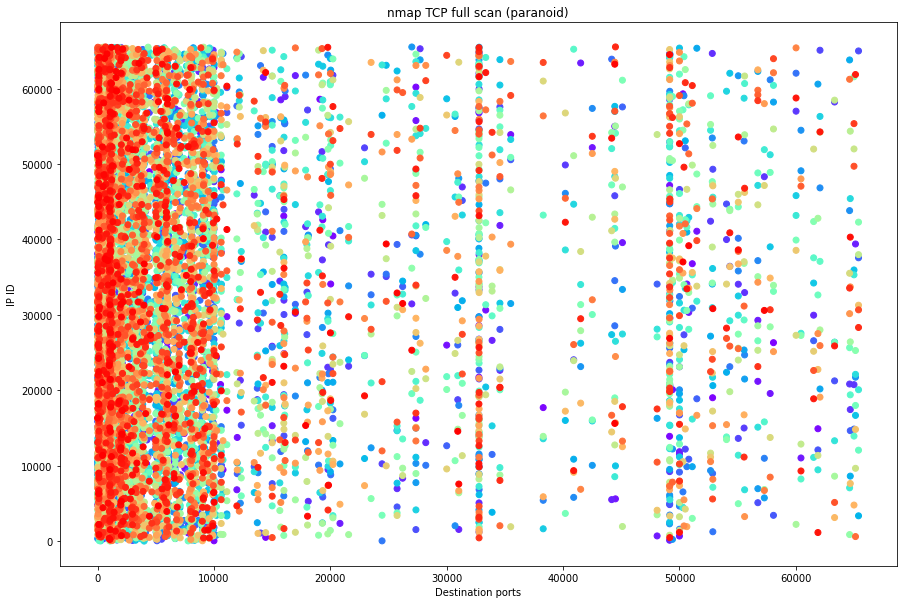

In [25]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

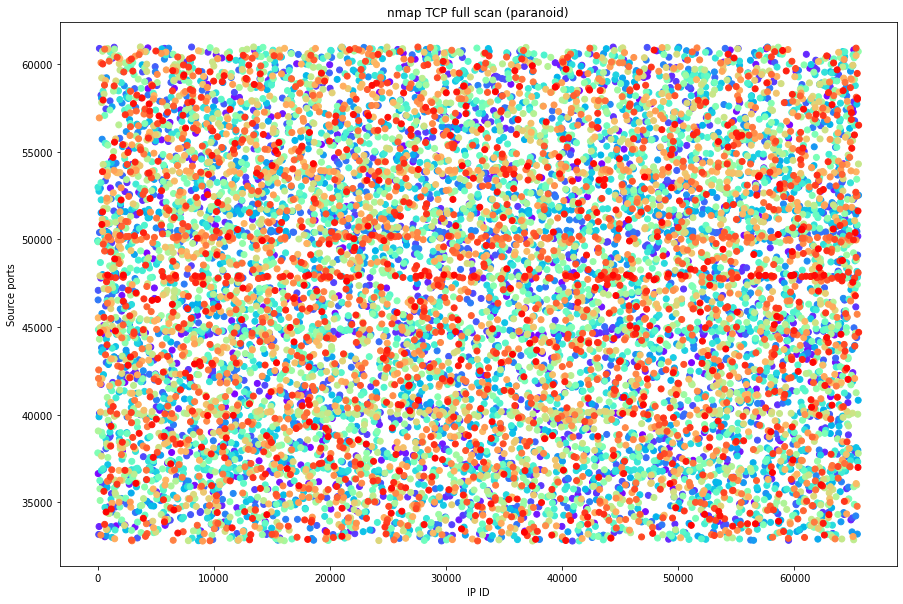

In [26]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
-----
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Pack

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 4031528449
Sequence number: 489944534
Sequence number: 4054869847
Sequence number: 2663433035
Sequence number: 1794497009
Sequence number: 2978780557
Sequence number: 456639021
Sequence number: 1948971974
Sequence number: 1679641214
Sequence number: 333763563
Sequence number: 2259086503
Sequence number: 2123801391
Sequence number: 1212002741
Sequence number: 545788163
Sequence number: 2971895840
Sequence number: 1741594237
Sequence number: 3298753950
Sequence number: 4149494698
Sequence number: 3223274893
Sequence number: 2391315952
Sequence number: 2563226592
Sequence number: 1685752505
Sequence number: 3229484647
Sequence number: 1267292463
Sequence number: 3548869169
Sequence number: 549881874
Sequence number: 1880448470
Sequence number: 2881913174
Sequence number: 565585003
Sequence number: 3635914595
Sequence number: 2177600753
Sequence number: 524212176
Sequence number: 1913727420
Sequence number: 867557266
Sequence number: 4256128412
Sequence number: 1896564268


Sequence number: 4192335092
Sequence number: 3046806664
Sequence number: 2783303147
Sequence number: 1930300204
Sequence number: 3996843689
Sequence number: 1852653778
Sequence number: 1952911177
Sequence number: 727591178
Sequence number: 2379862473
Sequence number: 1668901449
Sequence number: 576039943
Sequence number: 313530653
Sequence number: 1719623097
Sequence number: 1118627572
Sequence number: 4078748115
Sequence number: 2822443184
Sequence number: 385672856
Sequence number: 1321177404
Sequence number: 245694029
Sequence number: 3049227214
Sequence number: 1684559542
Sequence number: 2910183530
Sequence number: 1095659688
Sequence number: 2534475974
Sequence number: 3880436436
Sequence number: 4178475695
Sequence number: 286838258
Sequence number: 3644259611
Sequence number: 3271706680
Sequence number: 2657541301
Sequence number: 1028945014
Sequence number: 2835460226
Sequence number: 49707174
Sequence number: 3355269839
Sequence number: 1497893102
Sequence number: 280644968
S

Sequence number: 3738046910
Sequence number: 1820483996
Sequence number: 2285570460
Sequence number: 1129011166
Sequence number: 2938810873
Sequence number: 703612528
Sequence number: 3394087389
Sequence number: 49860827
Sequence number: 3121080026
Sequence number: 216254096
Sequence number: 3071153382
Sequence number: 139891419
Sequence number: 708531012
Sequence number: 3609330701
Sequence number: 2010884714
Sequence number: 2303339488
Sequence number: 510767134
Sequence number: 1603657925
Sequence number: 2564075410
Sequence number: 3482036963
Sequence number: 2914965563
Sequence number: 3746599760
Sequence number: 1547262509
Sequence number: 1780303027
Sequence number: 3003556357
Sequence number: 2483511684
Sequence number: 1384001479
Sequence number: 1768126192
Sequence number: 1507585603
Sequence number: 289157159
Sequence number: 1357284961
Sequence number: 3664836593
Sequence number: 4273533208
Sequence number: 2351013547
Sequence number: 1559961157
Sequence number: 2650441538


Sequence number: 4259831140
Sequence number: 2293251799
Sequence number: 1094660777
Sequence number: 3932324947
Sequence number: 2308406005
Sequence number: 2588154197
Sequence number: 2286073937
Sequence number: 831318220
Sequence number: 3352603307
Sequence number: 3899389463
Sequence number: 2620051195
Sequence number: 2268088875
Sequence number: 2977694297
Sequence number: 313992727
Sequence number: 3768515431
Sequence number: 1094996680
Sequence number: 763672767
Sequence number: 994410700
Sequence number: 746655511
Sequence number: 1110425760
Sequence number: 1485691538
Sequence number: 2308401936
Sequence number: 1401876541
Sequence number: 4233504391
Sequence number: 3581143053
Sequence number: 2767691465
Sequence number: 3155791211
Sequence number: 4038675113
Sequence number: 1795207485
Sequence number: 4171278758
Sequence number: 3315095840
Sequence number: 1412174744
Sequence number: 4211277455
Sequence number: 1404688442
Sequence number: 474392844
Sequence number: 132216732

Sequence number: 3114086826
Sequence number: 2219402678
Sequence number: 3093693701
Sequence number: 4198543373
Sequence number: 762443722
Sequence number: 1985798171
Sequence number: 3187026480
Sequence number: 2968006763
Sequence number: 4086267327
Sequence number: 959950612
Sequence number: 3953013933
Sequence number: 2833844381
Sequence number: 2000557811
Sequence number: 1361026674
Sequence number: 3592327202
Sequence number: 1472256840
Sequence number: 486340787
Sequence number: 1864192725
Sequence number: 1335823581
Sequence number: 1007823428
Sequence number: 788578173
Sequence number: 3027049377
Sequence number: 3373770712
Sequence number: 2851757509
Sequence number: 2013401423
Sequence number: 3141623341
Sequence number: 2210351701
Sequence number: 1256729139
Sequence number: 4260054449
Sequence number: 433267663
Sequence number: 3063136485
Sequence number: 204759082
Sequence number: 1856286022
Sequence number: 1362081429
Sequence number: 1823631369
Sequence number: 105034623

Sequence number: 3392652492
Sequence number: 772023236
Sequence number: 2883009013
Sequence number: 2623258128
Sequence number: 2863629668
Sequence number: 2331208408
Sequence number: 2253527552
Sequence number: 625028825
Sequence number: 1935400932
Sequence number: 888280696
Sequence number: 646702541
Sequence number: 4243996347
Sequence number: 3439517155
Sequence number: 3191520842
Sequence number: 3498303273
Sequence number: 4134419218
Sequence number: 2041923026
Sequence number: 3676784765
Sequence number: 3088560360
Sequence number: 1569764904
Sequence number: 534725914
Sequence number: 3215316815
Sequence number: 432314681
Sequence number: 1685108919
Sequence number: 3596315975
Sequence number: 1123723651
Sequence number: 1741629543
Sequence number: 1820539172
Sequence number: 2298272590
Sequence number: 3799073996
Sequence number: 659947126
Sequence number: 764278552
Sequence number: 4065265249
Sequence number: 2426165728
Sequence number: 954363314
Sequence number: 2087107077
S

Sequence number: 3106075887
Sequence number: 498923506
Sequence number: 523013981
Sequence number: 1377551027
Sequence number: 3279839691
Sequence number: 2616122099
Sequence number: 80364752
Sequence number: 3988848526
Sequence number: 3206366147
Sequence number: 621378352
Sequence number: 3886382063
Sequence number: 3026498041
Sequence number: 1674585365
Sequence number: 99376668
Sequence number: 4130048728
Sequence number: 1616810569
Sequence number: 2200011993
Sequence number: 3374631469
Sequence number: 3048211540
Sequence number: 1176337291
Sequence number: 3927008147
Sequence number: 2640229242
Sequence number: 1372049306
Sequence number: 1615064225
Sequence number: 2243238670
Sequence number: 3412299761
Sequence number: 345258567
Sequence number: 2419510756
Sequence number: 1121086054
Sequence number: 2907573448
Sequence number: 916002378
Sequence number: 1257815190
Sequence number: 3702460592
Sequence number: 3304533941
Sequence number: 1848715732
Sequence number: 3375481020
S

Sequence number: 1689810451
Sequence number: 1933348366
Sequence number: 2799072577
Sequence number: 2845497979
Sequence number: 3540562812
Sequence number: 1724602151
Sequence number: 1459611708
Sequence number: 3541671387
Sequence number: 1810417527
Sequence number: 2019204675
Sequence number: 275217204
Sequence number: 4426991
Sequence number: 2379472169
Sequence number: 2185149662
Sequence number: 2601222457
Sequence number: 1469960951
Sequence number: 1893696995
Sequence number: 1018787458
Sequence number: 2010204177
Sequence number: 1398471843
Sequence number: 1654293831
Sequence number: 139372093
Sequence number: 2119418658
Sequence number: 2340753730
Sequence number: 2949811725
Sequence number: 1456134780
Sequence number: 155789122
Sequence number: 1873390633
Sequence number: 1514819411
Sequence number: 485193359
Sequence number: 3536406484
Sequence number: 667368282
Sequence number: 727613271
Sequence number: 1883043021
Sequence number: 2840107765
Sequence number: 1576331977
S

Sequence number: 3587288190
Sequence number: 2685212836
Sequence number: 2028086773
Sequence number: 448695090
Sequence number: 1780351254
Sequence number: 2539293742
Sequence number: 3158027863
Sequence number: 237254775
Sequence number: 4223392633
Sequence number: 2939860861
Sequence number: 4034448698
Sequence number: 1833497094
Sequence number: 2623377393
Sequence number: 1843116450
Sequence number: 3781764695
Sequence number: 1036208964
Sequence number: 846101839
Sequence number: 3470526020
Sequence number: 382101951
Sequence number: 1798575126
Sequence number: 914695421
Sequence number: 1487157557
Sequence number: 485929347
Sequence number: 1145784287
Sequence number: 2733120070
Sequence number: 1141774869
Sequence number: 163212369
Sequence number: 2876781008
Sequence number: 1458539888
Sequence number: 162104596
Sequence number: 818607145
Sequence number: 3929630952
Sequence number: 663570531
Sequence number: 290821090
Sequence number: 1572832541
Sequence number: 99167267
Seque

Sequence number: 772530833
Sequence number: 3007759612
Sequence number: 153062234
Sequence number: 1387387909
Sequence number: 3899311490
Sequence number: 2735413068
Sequence number: 4240957567
Sequence number: 4117816403
Sequence number: 3533030098
Sequence number: 285233263
Sequence number: 3485203780
Sequence number: 3582118034
Sequence number: 3243973027
Sequence number: 374129850
Sequence number: 1138221446
Sequence number: 277301014
Sequence number: 3078253227
Sequence number: 3701654167
Sequence number: 4281203714
Sequence number: 2975774663
Sequence number: 3607302445
Sequence number: 4023309160
Sequence number: 2888710710
Sequence number: 2880470142
Sequence number: 348367357
Sequence number: 4014723912
Sequence number: 1557155449
Sequence number: 1035292154
Sequence number: 3468675647
Sequence number: 2197168221
Sequence number: 2997424920
Sequence number: 45208627
Sequence number: 1294630111
Sequence number: 416928290
Sequence number: 943929526
Sequence number: 1540748221
Se

Sequence number: 1540124759
Sequence number: 356499654
Sequence number: 3595234073
Sequence number: 2440828908
Sequence number: 2549863461
Sequence number: 3413612935
Sequence number: 2614602312
Sequence number: 2332642814
Sequence number: 2626036604
Sequence number: 2971828310
Sequence number: 2043261263
Sequence number: 1012619793
Sequence number: 1746540605
Sequence number: 830902458
Sequence number: 4246869694
Sequence number: 3899928328
Sequence number: 3852494844
Sequence number: 1980740999
Sequence number: 2755733247
Sequence number: 2888542074
Sequence number: 1012592270
Sequence number: 967507614
Sequence number: 1582234005
Sequence number: 4087569546
Sequence number: 3549736308
Sequence number: 4157618385
Sequence number: 1451351129
Sequence number: 3169374059
Sequence number: 931356422
Sequence number: 3766359220
Sequence number: 826678641
Sequence number: 2470623478
Sequence number: 4284275429
Sequence number: 1015307377
Sequence number: 986216798
Sequence number: 362437231

Sequence number: 1864804043
Sequence number: 807963320
Sequence number: 3163196458
Sequence number: 1703386448
Sequence number: 662608805
Sequence number: 4222232338
Sequence number: 3652239841
Sequence number: 3543568638
Sequence number: 1708461489
Sequence number: 2335092546
Sequence number: 3926393773
Sequence number: 2359156038
Sequence number: 1479848259
Sequence number: 86072855
Sequence number: 2034407627
Sequence number: 651890811
Sequence number: 3503631288
Sequence number: 4009237186
Sequence number: 3648883009
Sequence number: 3388837705
Sequence number: 2511985158
Sequence number: 51748524
Sequence number: 2921457208
Sequence number: 3609446476
Sequence number: 1463576316
Sequence number: 676835731
Sequence number: 3643786615
Sequence number: 1223604289
Sequence number: 586756886
Sequence number: 2519639880
Sequence number: 3772192228
Sequence number: 4216373546
Sequence number: 1595835627
Sequence number: 2671106016
Sequence number: 2255018624
Sequence number: 2524445563
S

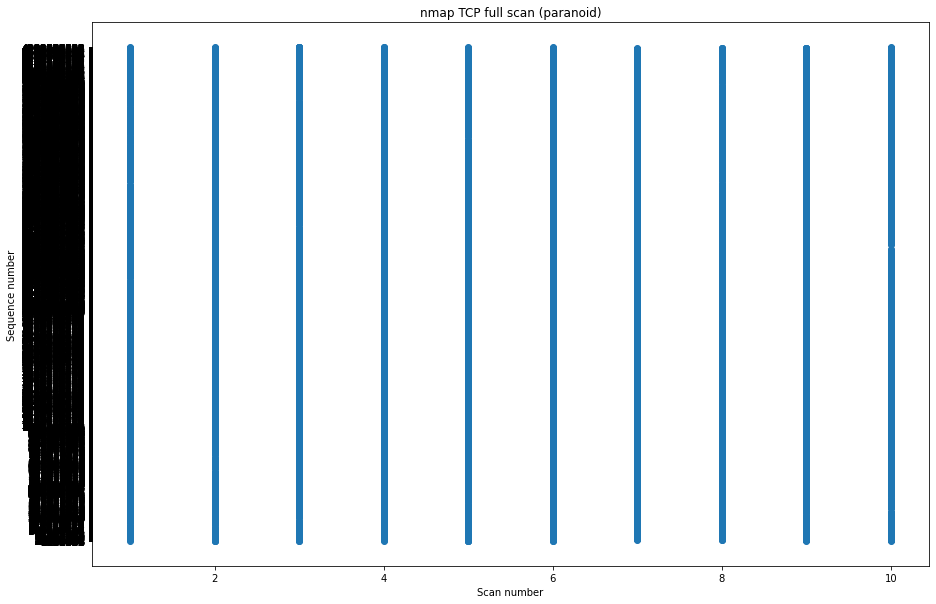

In [30]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


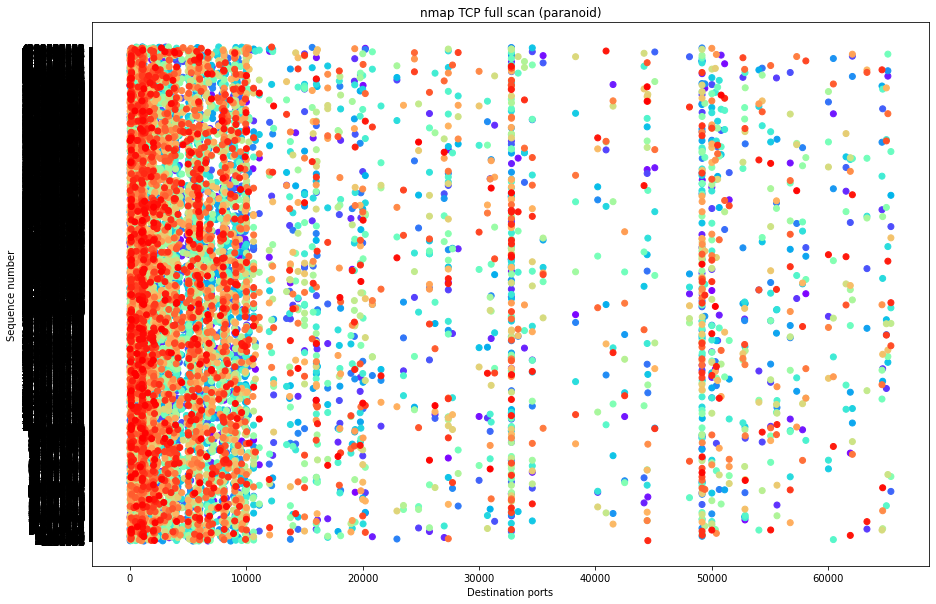

In [31]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

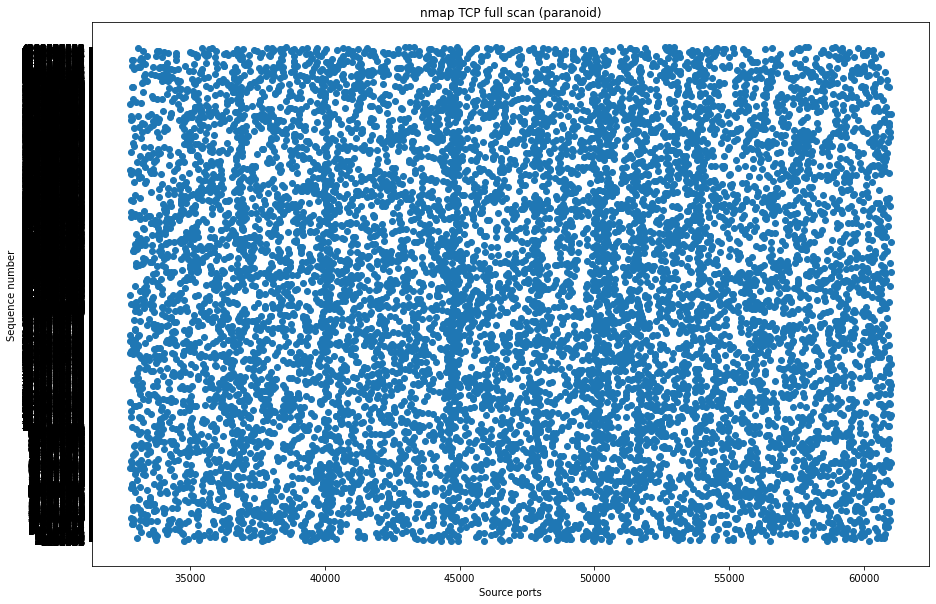

In [32]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [33]:
len(set(orders_port['sport']))

7664

In [34]:
orders_port['sport'].value_counts()[:30]

39978    6
60992    5
56496    5
44750    5
37596    5
57202    5
42862    5
52338    5
50450    5
57792    5
49732    5
36860    5
39674    5
47052    5
55156    5
37716    5
39300    5
46664    5
47792    5
40138    5
38924    5
45534    5
39436    4
44844    4
50502    4
37898    4
43952    4
44854    4
42234    4
55894    4
Name: sport, dtype: int64

## Flags

In [35]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F